<a href="https://colab.research.google.com/github/NehalH/RupeeClassifier_MobileNet/blob/main/RupeeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RupeeClassifier

In [ ]:
# Mount drive

from google.colab import drive
drive.mount('/content/drive')

import pickle

Mounted at /content/drive


In [ ]:
# CELL 2

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import numpy as np

# Define an ImageDataGenerator for training data
train_datagen = ImageDataGenerator(rescale=1./255)

# Define an ImageDataGenerator for validation data
val_datagen = ImageDataGenerator(rescale=1./255)

# Specify the paths to your dataset on Google Drive
train_dataset_path = '/content/drive/MyDrive/A-eye/Datasets/2Indian Currency Dataset/training'
val_dataset_path = '/content/drive/MyDrive/A-eye/Datasets/2Indian Currency Dataset/validation'

# Manually specify the classes
class_names = ['10', '20', '50', '100', '200', '500', '2000']

# Create data generators for training and validation images with manual class specification
train_generator = train_datagen.flow_from_directory(
    train_dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=class_names
)

val_generator = val_datagen.flow_from_directory(
    val_dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=class_names
)

Found 3500 images belonging to 7 classes.
Found 700 images belonging to 7 classes.


In [ ]:

# Load MobileNet base model (pre-trained on ImageNet)
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build your custom model on top of MobileNet
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Train the model on the training data with early stopping
history = model.fit(train_generator, epochs=50, validation_data=val_generator, callbacks=[early_stopping])

# Save the model in .tf format
tf_model_path = '/content/drive/MyDrive/A-eye/Models/Rupee_Classifier/rupee_classifier.tf'
model.save(tf_model_path, save_format='tf')

17225924/17225924 [==============================] - 0s 0us/step
Epoch 1/50
  7/110 [>.............................] - ETA: 29:36 - loss: 1.7385 - accuracy: 0.4152

KeyboardInterrupt: 

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# SAVE cell 3 variables
variables_to_save = {
    'class_names': class_names,
    'base_model': base_model,
    'model': model,
    'history': history
}

file_path = '/content/drive/MyDrive/A-eye/pickle_jar/cell3_variables.pkl'

with open(file_path, 'wb') as f:
    pickle.dump(variables_to_save, f)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Load cell 3 variables
file_path = '/content/drive/MyDrive/A-eye/pickle_jar/cell3_variables.pkl'

with open(file_path, 'rb') as f:
    loaded_variables = pickle.load(f)

base_model = loaded_variables['base_model']
model = loaded_variables['model']
history = loaded_variables['history']

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

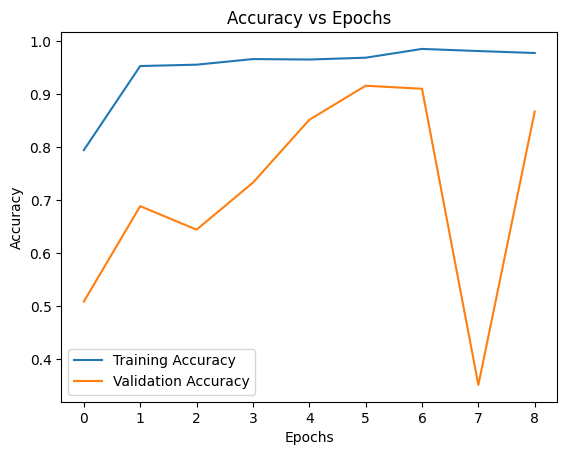

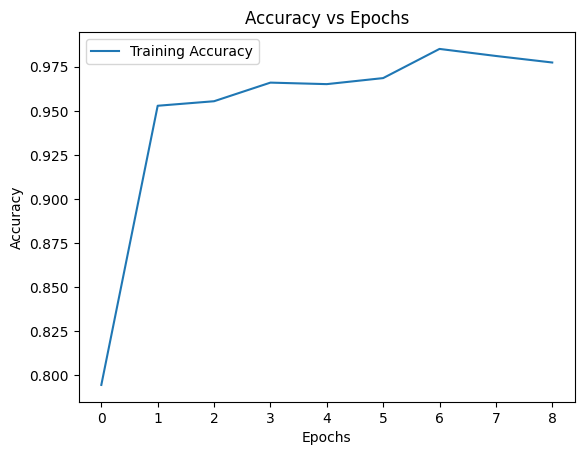

22/22 [==============================] - 69s 3s/step


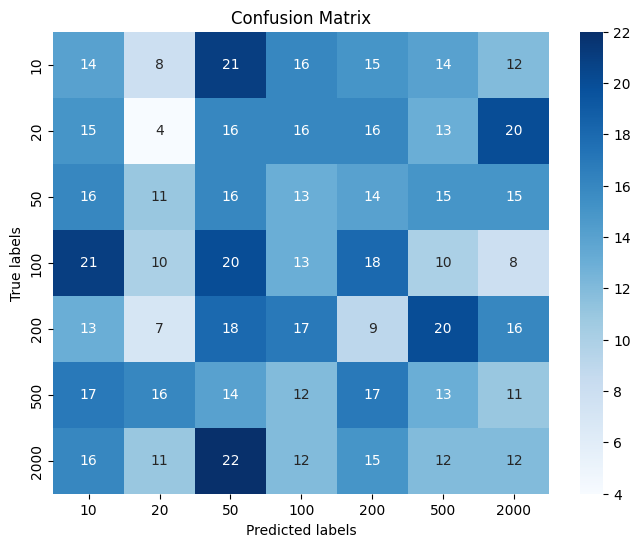

In [ ]:

# Plotting Accuracy vs Epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()

# Predict labels for validation data
y_pred_prob = model.predict(val_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Get true labels for validation data
y_true = val_generator.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# SAVE cell 4 variables
variables_to_save = {
    'y_pred_prob': y_pred_prob,
    'y_pred': y_pred,
    'y_true': y_true,
    'cm': cm
}

file_path = '/content/drive/MyDrive/A-eye/pickle_jar/cell4_variables.pkl'

with open(file_path, 'wb') as f:
    pickle.dump(variables_to_save, f)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Load cell 4 variables
file_path = '/content/drive/MyDrive/A-eye/pickle_jar/cell4_variables.pkl'

with open(file_path, 'rb') as f:
    loaded_variables = pickle.load(f)

y_true = loaded_variables['y_true']
y_pred = loaded_variables['y_pred']
f1_scores = loaded_variables['f1_scores']

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

In [ ]:

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Compute accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

# Compute precision, recall, and F1-score
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Compute error rate
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

Confusion Matrix:
[[14  8 21 16 15 14 12]
 [15  4 16 16 16 13 20]
 [16 11 16 13 14 15 15]
 [21 10 20 13 18 10  8]
 [13  7 18 17  9 20 16]
 [17 16 14 12 17 13 11]
 [16 11 22 12 15 12 12]]
Accuracy: 0.11571428571428571
Precision: 0.11288821862602805
Recall: 0.11571428571428573
F1-Score: 0.1136469174853482
Error Rate: 0.8842857142857143


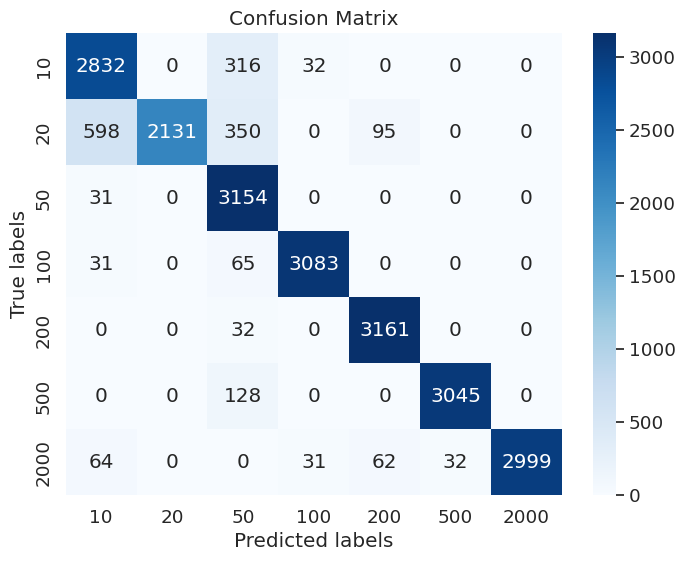

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the classes
classes = ['10', '20', '50', '100', '200', '500', '2000']


# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

##Saving

In [ ]:
# import tensorflow as tf

# # Convert the model to Unquantized TensorFlow Lite
# unquantized_converter = tf.lite.TFLiteConverter.from_saved_model(tf_model_path)
# unquantized_tflite_model = unquantized_converter.convert()

# # Save the TFLite model
# with open('/content/drive/MyDrive/A-eye/Models/Rupee_Classifier/rupee_classifier_unquant.tflite', 'wb') as f:
#     f.write(unquantized_tflite_model)


In [ ]:
# # Convert the model to Quantized TensorFlow Lite

# quantized_converter = tf.lite.TFLiteConverter.from_saved_model(tf_model_path)

# # Enable quantization
# quantized_converter.optimizations = [tf.lite.Optimize.DEFAULT]

# quantized_tflite_model = quantized_converter.convert()

# # Save the Quantized TFLite model
# with open('/content/drive/MyDrive/A-eye/Models/Rupee_Classifier/rupee_classifier_quant.tflite', 'wb') as f:
#     f.write(quantized_tflite_model)

In [ ]:
# # Path to save the labels file
# labels_path = '/content/drive/MyDrive/A-eye/Models/Rupee_Classifier/labels.txt'

# # Write class names to the labels file
# with open(labels_path, 'w') as f:
#     for class_name in class_names:
#         f.write(f"{class_name}\n")

##Testing

In [ ]:
# import tensorflow as tf
# from PIL import Image
# import numpy as np

# # Load the Quantized TFLite model
# tflite_model_path = '/content/drive/MyDrive/A-eye/Models/Rupee_Classifier/rupee_classifier_quant.tflite'
# interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
# interpreter.allocate_tensors()

# # Load the labels
# labels_path = '/content/drive/MyDrive/A-eye/Models/Rupee_Classifier/labels.txt'
# with open(labels_path, 'r') as f:
#     labels = [line.strip() for line in f.readlines()]

# # Load a custom image
# custom_image_path = '/content/full.jpg'  # Replace with the path to your image
# custom_image = Image.open(custom_image_path).resize((224, 224))

# # Preprocess the image
# input_tensor_index = interpreter.get_input_details()[0]['index']
# input_tensor = np.expand_dims(custom_image, axis=0) / 255.0  # Assuming normalization to [0, 1]
# interpreter.set_tensor(input_tensor_index, input_tensor.astype(np.float32))

# # Run inference
# interpreter.invoke()

# # Get the output
# output_tensor_index = interpreter.get_output_details()[0]['index']
# output_tensor = interpreter.get_tensor(output_tensor_index)

# # Get the predicted class index
# predicted_class_index = np.argmax(output_tensor)

# # Get the predicted class label
# predicted_class_label = labels[predicted_class_index]

# print(f"Predicted Class: {predicted_class_label}")


##Results

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt


# Get the true labels
true_labels = []
for i in range(len(train_generator)):
    true_labels.extend(np.argmax(train_generator[i][1], axis=1))

# Predict the labels
predicted_labels = np.argmax(model.predict(train_generator), axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels, average='weighted')
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
conf_mtx = confusion_matrix(true_labels, predicted_labels)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_mtx)

# Plot intensity graph
plt.imshow(conf_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


NameError: name 'train_generator' is not defined